**Import all tools needed**

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression        
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error as mse
from scipy.stats import zscore
from scipy.stats import stats

**Read in data frame ks_house_data**

In [2]:
df = pd.read_csv('../data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


**Copy and paste the list of columns given for future reference**

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


**Create new dataframe with specific column names given above**
**name it new_df**

In [3]:
new_df = df[['id','price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'bedrooms', 'lat', 'waterfront', 'floors']]
new_df

,id,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,bedrooms,lat,waterfront,floors
0,7129300520,221900.0,1180,7,1180,1340,1.00,0.0,3,47.5112,NaN,1.0
1,6414100192,538000.0,2570,7,2170,1690,2.25,0.0,3,47.7210,0.0,2.0
2,5631500400,180000.0,770,6,770,2720,1.00,0.0,2,47.7379,0.0,1.0
3,2487200875,604000.0,1960,7,1050,1360,3.00,0.0,4,47.5208,0.0,1.0
4,1954400510,510000.0,1680,8,1680,1800,2.00,0.0,3,47.6168,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,1530,8,1530,1530,2.50,0.0,3,47.6993,0.0,3.0
21593,6600060120,400000.0,2310,8,2310,1830,2.50,0.0,4,47.5107,0.0,2.0
21594,1523300141,402101.0,1020,7,1020,1020,0.75,0.0,2,47.5944,0.0,2.0
21595,291310100,400000.0,1600,8,1600,1410,2.50,0.0,3,47.5345,NaN,2.0


**Look up all the correlations of each column to each other and print to investigate**

In [4]:
corr = new_df.corr()
corr

,id,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,bedrooms,lat,waterfront,floors
id,1.000000,-0.016772,-0.012241,0.008188,-0.010799,-0.002701,0.005162,0.011592,0.001150,-0.001798,-0.004176,0.018608
price,-0.016772,1.000000,0.701917,0.667951,0.605368,0.585241,0.525906,0.395734,0.308787,0.306692,0.276295,0.256804
sqft_living,-0.012241,0.701917,1.000000,0.762779,0.876448,0.756402,0.755758,0.282532,0.578212,0.052155,0.110230,0.353953
grade,0.008188,0.667951,0.762779,1.000000,0.756073,0.713867,0.665838,0.249727,0.356563,0.113575,0.087383,0.458794
sqft_above,-0.010799,0.605368,0.876448,0.756073,1.000000,0.731767,0.686668,0.166299,0.479386,-0.001199,0.075463,0.523989
sqft_living15,-0.002701,0.585241,0.756402,0.713867,0.731767,1.000000,0.569884,0.279561,0.393406,0.048679,0.088860,0.280102
bathrooms,0.005162,0.525906,0.755758,0.665838,0.686668,0.569884,1.000000,0.186451,0.514508,0.024280,0.067282,0.502582
view,0.011592,0.395734,0.282532,0.249727,0.166299,0.279561,0.186451,1.000000,0.078523,0.006141,0.406654,0.028436
bedrooms,0.001150,0.308787,0.578212,0.356563,0.479386,0.393406,0.514508,0.078523,1.000000,-0.009951,-0.002386,0.177944
lat,-0.001798,0.306692,0.052155,0.113575,-0.001199,0.048679,0.024280,0.006141,-0.009951,1.000000,-0.012772,0.049239


**Drop all null values**
**We had to drop the index 15856 because the encoder could not work with differnet a number of values in the test and training data, and since it was only a single entry, it wont affect us badly when dropped. Dropping this allowed the encoder to run and improve our model by a ton**

In [5]:
new_df = new_df.dropna()
new_df = new_df.drop(labels=15856, axis=0)

**After investigating the correlations, we wanted to look at how the number of bedrooms effect the home prices. For better visualization, we created a pair plot.**

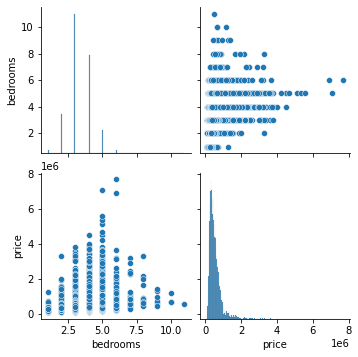

In [6]:
import seaborn as sns

g = sns.pairplot(new_df, vars=["bedrooms", "price"])

import matplotlib.pyplot as plt
plt.show()

**Becuase the pairplots above are not very interpretive, we created a more vizually appealing scatter plot. As the plot shows, if a house has over 6 bedrooms, the price is no longer majorly affected.**

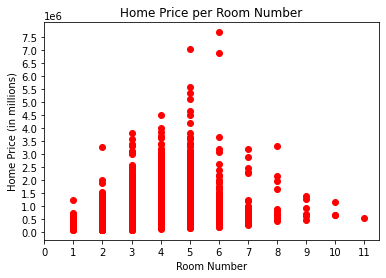

<Figure size 432x288 with 0 Axes>

In [7]:
plt.scatter(new_df.bedrooms, new_df.price, color='red')
plt.xlabel('Room Number')
plt.ylabel('Home Price (in millions)')
plt.title('Home Price per Room Number')
plt.xticks(np.arange(0, 12, 1))
plt.yticks(np.arange(0, 8000000, 500000))
plt.show()
plt.savefig('homepriceperroom.png')
#Create scatter plot to analyaze the price differences between number of bedrooms/observe which number of rooms is most popular.

In [8]:
df = df.dropna()
df = df.drop(labels=15856, axis=0)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [9]:
df["date"] = df.date.apply(lambda x: x[-4:])
type(df['date'])

pandas.core.series.Series

In [10]:
df = df.replace('?',np.nan)

df = df.dropna()

In [11]:
df = df.drop(labels=3220, axis=0)

In [12]:
reg = LinearRegression()
y = df['price']
X = df.drop(['id', 'price'], axis = 1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


In [14]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(X_train[['view', 'grade', 'zipcode']])
transformed_train = encoder.transform(X_train[['view', 'grade', 'zipcode']])
transformed_train = pd.DataFrame(transformed_train, columns = encoder.get_feature_names(), index=X_train.index)
X_train_encoded = pd.concat([X_train.drop(['view', 'grade', 'zipcode'], axis = 1), transformed_train], axis = 1)
test_condition = encoder.transform(X_test[['view', 'grade', 'zipcode']])
test_condition = pd.DataFrame(test_condition, columns=encoder.get_feature_names(), index=X_test.index)
test_condition = pd.concat([X_test.drop(['view', 'grade', 'zipcode'], axis = 1), test_condition], axis = 1)

In [15]:
reg.fit(X_train_encoded, y_train)
reg.score(X_train_encoded, y_train)


0.840624332728187

In [16]:
reg.score(test_condition, y_test)

0.8145009320259429

In [17]:
train_preds = reg.predict(X_train_encoded)
test_preds = reg.predict(test_condition)

In [18]:
np.sqrt(mse(y_train, train_preds))


143663.9785123915

In [19]:
mse(y_test, test_preds, squared=False)

176476.39588833158

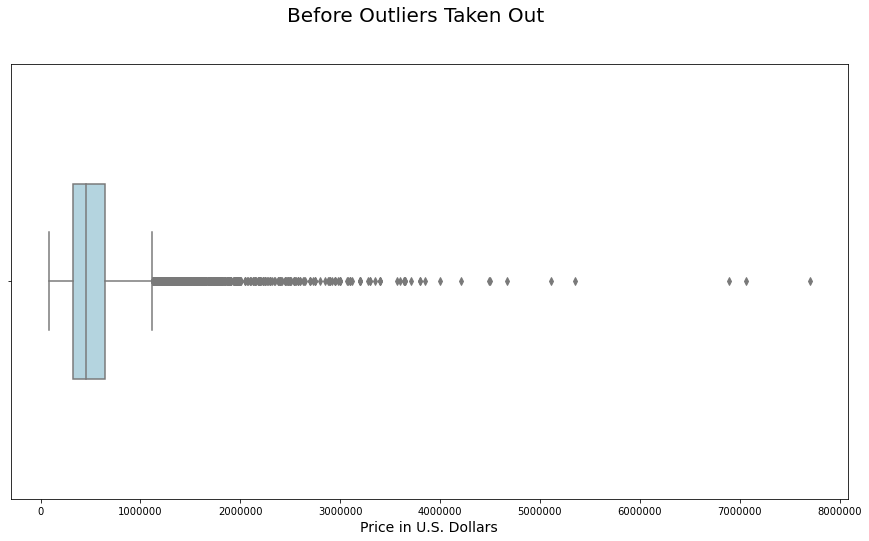

In [20]:
fig, ax = plt.subplots(figsize=(15,8))
plt.ticklabel_format(style="plain")
sns.boxplot(x=df['price'], width = .45, color = 'lightblue');
plt.suptitle("Before Outliers Taken Out", fontsize=20)
plt.xlabel("Price in U.S. Dollars", fontsize=14)
plt.savefig('beforeoutliers.png')

In [21]:
df_2 = df.copy()
df_2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
8,2414600126,2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [22]:
q_low = df_2["price"].quantile(0.01)
q_hi  = df_2["price"].quantile(0.99)

df_filtered = df_2[(df_2["price"] < q_hi) & (df_2["price"] > q_low)]


In [23]:
df_filtered = df_filtered.drop(labels=5446, axis=0)

In [24]:
reg_2 = LinearRegression()
y = df_filtered['price']
X = df_filtered.drop(['id', 'price'], axis = 1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


In [26]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(X_train[['view', 'grade', 'zipcode']])
transformed_train = encoder.transform(X_train[['view', 'grade', 'zipcode']])
transformed_train = pd.DataFrame(transformed_train, columns = encoder.get_feature_names(), index=X_train.index)
X_train_encoded = pd.concat([X_train.drop(['view', 'grade', 'zipcode'], axis = 1), transformed_train], axis = 1)
test_condition = encoder.transform(X_test[['view', 'grade', 'zipcode']])
test_condition = pd.DataFrame(test_condition, columns=encoder.get_feature_names(), index=X_test.index)
test_condition = pd.concat([X_test.drop(['view', 'grade', 'zipcode'], axis = 1), test_condition], axis = 1)

In [27]:
reg.fit(X_train_encoded, y_train)
reg.score(X_train_encoded, y_train)


0.8492893553644953

In [28]:
reg.score(test_condition, y_test)

0.8556678891117264

In [29]:
train_preds = reg.predict(X_train_encoded)
test_preds = reg.predict(test_condition)

In [30]:
np.sqrt(mse(y_train, train_preds))


109665.08353490481

In [31]:
mse(y_test, test_preds, squared=False)

109613.52076837461

In [32]:
df_3 = df_filtered.copy()

In [33]:
reg_3 = LinearRegression()
y = df_3['price']
X = df_3.drop(['id', 'price',], axis = 1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


In [35]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(X_train[['view', 'grade', 'zipcode']])
transformed_train = encoder.transform(X_train[['view', 'grade', 'zipcode']])
transformed_train = pd.DataFrame(transformed_train, columns = encoder.get_feature_names(), index=X_train.index)
X_train_encoded = pd.concat([X_train.drop(['view', 'grade', 'zipcode'], axis = 1), transformed_train], axis = 1)
test_condition = encoder.transform(X_test[['view', 'grade', 'zipcode']])
test_condition = pd.DataFrame(test_condition, columns=encoder.get_feature_names(), index=X_test.index)
test_condition = pd.concat([X_test.drop(['view', 'grade', 'zipcode'], axis = 1), test_condition], axis = 1)

In [36]:
reg.fit(X_train_encoded, y_train)
reg.score(X_train_encoded, y_train)

0.8492893553644953

In [37]:
reg.score(test_condition, y_test)

0.8556678891117264

In [38]:
train_preds = reg.predict(X_train_encoded)
test_preds = reg.predict(test_condition)

In [39]:
np.sqrt(mse(y_train, train_preds))

109665.08353490481

In [40]:
mse(y_test, test_preds, squared=False)

109613.52076837461

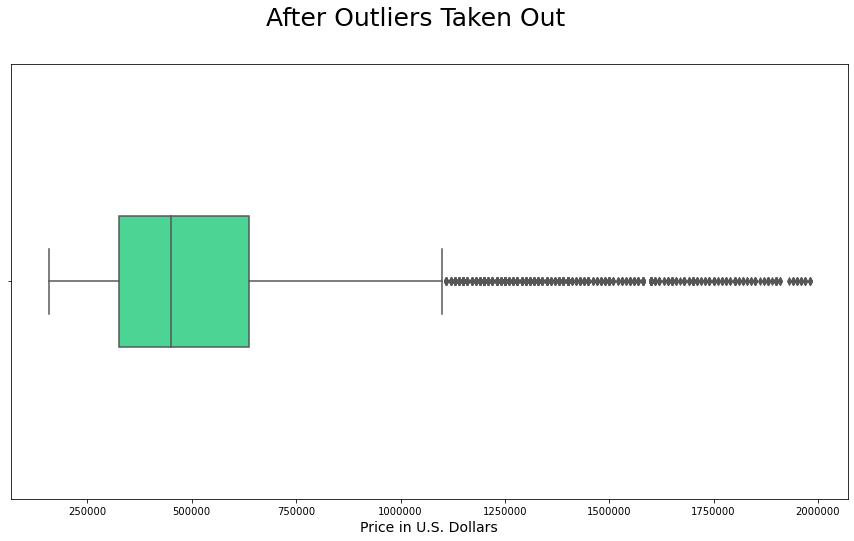

In [41]:
fig, ax = plt.subplots(figsize=(15,8))
plt.ticklabel_format(style="plain")
sns.boxplot(x=df_3['price'], width = .3, color = '#34eb95');
plt.suptitle("After Outliers Taken Out", fontsize=25)
plt.xlabel("Price in U.S. Dollars", fontsize=14)
plt.savefig('afteroutliers.png')

In [42]:
percent_yearrevn_dropped = 3824/21597
percent_yearrevn_dropped

0.17706162892994398

In [43]:
percent_wat_dropped = 2376/21597
percent_wat_dropped

0.11001527989998611

In [44]:
percent_view_dropped = 63/21597
percent_view_dropped

0.0029170718155299346

In [45]:
df.condition.sort_values(ascending=False)
#checking the values on condition

2363     5
12533    5
6390     5
6397     5
2374     5
        ..
3199     1
1440     1
16879    1
2221     1
3971     1
Name: condition, Length: 15427, dtype: int64

In [46]:

encoder = OneHotEncoder(sparse=False)
encoder.fit(X_train[['view', 'grade']])
transformed_train = encoder.transform(X_train[['view', 'grade']])
transformed_train = pd.DataFrame(transformed_train, columns = encoder.get_feature_names(), index=X_train.index)
X_train_encoded = pd.concat([X_train.drop(['view', 'grade'], axis = 1), transformed_train], axis = 1)
test_condition = encoder.transform(X_test[['view', 'grade']])
test_condition = pd.DataFrame(test_condition, columns=encoder.get_feature_names(), index=X_test.index)
test_condition = pd.concat([X_test.drop(['view', 'grade',], axis = 1), test_condition], axis = 1)

In [47]:
X_train_encoded

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,...,x0_4.0,x1_4,x1_5,x1_6,x1_7,x1_8,x1_9,x1_10,x1_11,x1_12
19551,2014,4,1.50,1200,10890,1.0,0.0,5,1200,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5967,2015,4,2.50,1700,6675,2.0,0.0,3,1700,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10100,2014,3,2.50,2090,6000,1.5,0.0,4,2090,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
18819,2015,4,2.50,2130,9013,2.0,0.0,3,2130,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17635,2014,4,3.25,2420,4000,1.5,0.0,5,1870,550.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7423,2014,4,2.50,1840,4011,2.0,0.0,3,1840,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19158,2015,3,1.00,970,11963,1.0,0.0,4,970,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7701,2014,2,2.00,1340,5350,1.5,0.0,3,1340,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1206,2014,4,1.75,2490,7834,1.0,0.0,4,1240,1250.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [48]:
reg.fit(X_train_encoded, y_train)


LinearRegression()

In [49]:
reg.score(X_train_encoded, y_train)


0.7215520260287462

In [50]:
reg.score(test_condition, y_test)

0.7230463137082672

In [51]:
train_preds = reg.predict(X_train_encoded)
test_preds = reg.predict(test_condition)

In [52]:
np.sqrt(mse(y_train, train_preds))

149062.51388400592

In [53]:
mse(y_test, test_preds, squared=False)

151840.00899197703

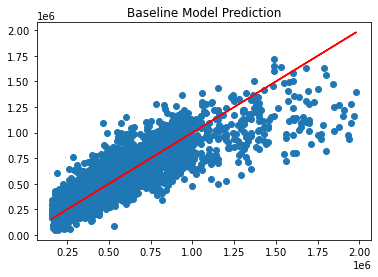

In [54]:

# plot test_preds against y_test
# plot x=y line to show "perfect prediction"
x = y_test
y = test_preds
plt.scatter(x,y)
plt.title('Baseline Model Prediction')
plt.plot(y_test,y_test, color= 'red');

In [55]:
list(zip(df.columns, reg.coef_))

[('id', 24030.86830464815),
 ('date', -14774.944947733886),
 ('price', 34415.09035869146),
 ('bedrooms', 66.7154081988128),
 ('bathrooms', 0.21618126139765367),
 ('sqft_living', 28312.09396977034),
 ('sqft_lot', 260139.2322417686),
 ('floors', 31161.99417888569),
 ('waterfront', 32.8710627160088),
 ('view', 33.844317375236244),
 ('condition', -1935.1438105689351),
 ('grade', 24.4783770101934),
 ('sqft_above', -470.9203008998771),
 ('sqft_basement', 597024.3327785113),
 ('yr_built', -162826.57471104764),
 ('yr_renovated', 36.46840175574007),
 ('zipcode', -0.20544624317594387),
 ('lat', -98548.97068235012),
 ('long', -4873.421737259261),
 ('sqft_living15', -19846.9817484334),
 ('sqft_lot15', 48623.88902972086)]

Text(0.5, 0, 'Prices')

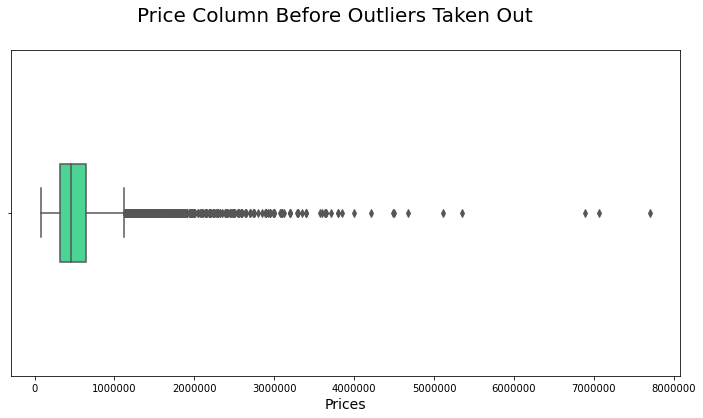

In [56]:
fig, ax = plt.subplots(figsize=(12,6))
plt.ticklabel_format(style="plain")
sns.boxplot(x=df_2.price, width = .3, color = '#34eb95');
plt.suptitle("Price Column Before Outliers Taken Out", fontsize=20)
plt.xlabel("Prices", fontsize=14)

In [57]:
from scipy.stats import zscore
from scipy.stats import stats
z_scores = stats.zscore(df_2.price) 
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
new_df2_price = df_2.price[filtered_entries]
new_df2_price

1         538000.0
3         604000.0
4         510000.0
5        1230000.0
8         229500.0
           ...    
21591     475000.0
21592     360000.0
21593     400000.0
21594     402101.0
21596     325000.0
Name: price, Length: 15151, dtype: float64

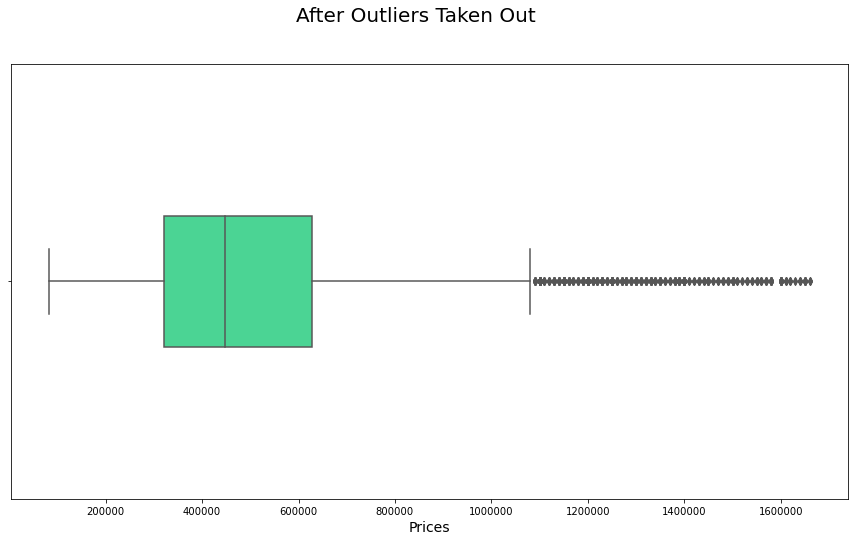

In [58]:
fig, ax = plt.subplots(figsize=(15,8))
plt.ticklabel_format(style="plain")
sns.boxplot(x=new_df2_price, width = .3, color = '#34eb95');
plt.suptitle("After Outliers Taken Out", fontsize=20)
plt.xlabel("Prices", fontsize=14)
plt.savefig('afteroutlierstakenout.png')

In [59]:
df2_copy = df_2[filtered_entries].copy()

In [60]:
reg_without_outliers = LinearRegression()
y = new_df2_price
X = df2_copy.drop(['id', 'price'], axis = 1)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


In [62]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(X_train[['view', 'grade', 'zipcode']])
transformed_train = encoder.transform(X_train[['view', 'grade', 'zipcode']])
transformed_train = pd.DataFrame(transformed_train, columns = encoder.get_feature_names(), index=X_train.index)
X_train_encoded = pd.concat([X_train.drop(['view', 'grade', 'zipcode'], axis = 1), transformed_train], axis = 1)
test_condition = encoder.transform(X_test[['view', 'grade', 'zipcode']])
test_condition = pd.DataFrame(test_condition, columns=encoder.get_feature_names(), index=X_test.index)
test_condition = pd.concat([X_test.drop(['view', 'grade', 'zipcode'], axis = 1), test_condition], axis = 1)

In [63]:
reg_without_outliers.fit(X_train,y_train)

LinearRegression()

In [64]:
reg_without_outliers.fit(X_train_encoded, y_train)

LinearRegression()

In [65]:
reg_without_outliers.score(X_train_encoded, y_train)

0.8477290572835575

In [66]:
reg_without_outliers.score(test_condition, y_test)

0.8473790368289617

In [67]:
train_preds = reg_without_outliers.predict(X_train_encoded)
test_preds = reg_without_outliers.predict(test_condition)

In [68]:
np.sqrt(mse(y_train, train_preds))

101155.68187067893

In [69]:
mse(y_test, test_preds, squared=False)

105763.01912913867

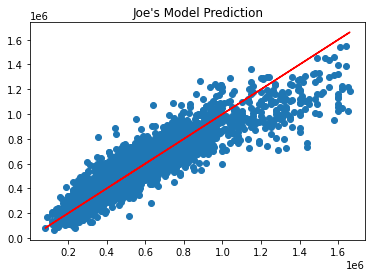

In [70]:
x = y_test
y = test_preds
plt.scatter(x,y)
plt.title("Joe's Model Prediction")
plt.plot(y_test,y_test, color= 'red')
plt.savefig('joesmodelprediction.png');

In [71]:
df3 = df2_copy

In [72]:
linreg = LinearRegression()

In [73]:
y = new_df2_price
X = df3.drop(['id', 'price', 'bedrooms'], axis = 1)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [75]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(X_train[['view', 'grade', 'zipcode']])
transformed_train = encoder.transform(X_train[['view', 'grade', 'zipcode']])
transformed_train = pd.DataFrame(transformed_train, columns = encoder.get_feature_names(), index=X_train.index)
X_train_encoded = pd.concat([X_train.drop(['view', 'grade', 'zipcode'], axis = 1), transformed_train], axis = 1)
test_condition = encoder.transform(X_test[['view', 'grade', 'zipcode']])
test_condition = pd.DataFrame(test_condition, columns=encoder.get_feature_names(), index=X_test.index)
test_condition = pd.concat([X_test.drop(['view', 'grade', 'zipcode'], axis = 1), test_condition], axis = 1)

In [76]:
linreg.fit(X_train,y_train)

LinearRegression()

In [77]:
linreg.fit(X_train_encoded, y_train)

LinearRegression()

In [78]:
linreg.score(X_train_encoded, y_train)

0.8475885629639406

In [79]:
linreg.score(test_condition, y_test)

0.8470426150969363

In [80]:
train_preds = linreg.predict(X_train_encoded)
test_preds = linreg.predict(test_condition)

In [81]:
np.sqrt(mse(y_train, train_preds))


101202.3372659663

In [82]:
mse(y_test, test_preds, squared=False)


105879.5214469478

In [83]:
df4 = df3.copy()

In [84]:
lrm = LinearRegression()

In [85]:
y = new_df2_price
X = df4.drop(['id', 'price', 'yr_renovated'], axis = 1)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


In [87]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(X_train[['view', 'grade', 'zipcode']])
transformed_train = encoder.transform(X_train[['view', 'grade', 'zipcode']])
transformed_train = pd.DataFrame(transformed_train, columns = encoder.get_feature_names(), index=X_train.index)
X_train_encoded = pd.concat([X_train.drop(['view', 'grade', 'zipcode'], axis = 1), transformed_train], axis = 1)
test_condition = encoder.transform(X_test[['view', 'grade', 'zipcode']])
test_condition = pd.DataFrame(test_condition, columns=encoder.get_feature_names(), index=X_test.index)
test_condition = pd.concat([X_test.drop(['view', 'grade', 'zipcode'], axis = 1), test_condition], axis = 1)

In [88]:
lrm.fit(X_train,y_train)

LinearRegression()

In [89]:
lrm.fit(X_train_encoded, y_train)


LinearRegression()

In [90]:
lrm.score(test_condition, y_test)

0.8453564587473171

In [91]:
train_preds = lrm.predict(X_train_encoded)
test_preds = lrm.predict(test_condition)

In [92]:
np.sqrt(mse(y_train, train_preds))

101437.39012471554

In [93]:
mse(y_test, test_preds, squared=False)

106461.51396447132

In [94]:
df5 = df4.copy()

In [95]:
df5 = df5.drop(labels=8537)

In [96]:
lrm = LinearRegression()


In [97]:
y = df5['price']
X = df5.drop(['id', 'price'], axis = 1)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


In [99]:
encoding_list = ['view', 'grade', 'zipcode', 'bathrooms']

In [100]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(X_train[encoding_list])

transformed_train = encoder.transform(X_train[encoding_list])
transformed_train = pd.DataFrame(transformed_train, columns = encoder.get_feature_names(), index=X_train.index)
X_train_encoded = pd.concat([X_train.drop(encoding_list, axis = 1), transformed_train], axis = 1)

test_condition = encoder.transform(X_test[encoding_list])
test_condition = pd.DataFrame(test_condition, columns=encoder.get_feature_names(), index=X_test.index)
test_condition = pd.concat([X_test.drop(encoding_list, axis = 1), test_condition], axis = 1)

In [101]:
lrm.fit(X_train,y_train)


LinearRegression()

In [102]:
lrm.fit(X_train_encoded, y_train)


LinearRegression()

In [103]:
lrm.score(X_train_encoded, y_train)


0.8503445737189369

In [104]:
lrm.score(test_condition, y_test)

0.846709308151527

In [105]:
train_preds = lrm.predict(X_train_encoded)
test_preds = lrm.predict(test_condition)

In [106]:
np.sqrt(mse(y_train, train_preds))

101415.64357808855

In [107]:
mse(y_test, test_preds, squared=False)

102664.71233046142

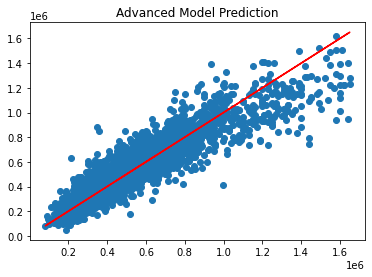

In [108]:
x = y_test
y = test_preds
plt.scatter(x,y)
plt.title('Advanced Model Prediction')
plt.plot(y_test,y_test, color= 'red')
plt.savefig('advancedmodelprediction.png');

**Read in data again for Colette's stuff**

In [109]:
kcdf = pd.read_csv("../data/kc_house_data.csv")
kcdf

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


**We found out what the correlation is between each of the feature variables and price, then sorted the correlations from lowest to highest value**

In [110]:
corr = kcdf.corr()
corr["price"].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.129599
floors           0.256804
waterfront       0.276295
lat              0.306692
bedrooms         0.308787
view             0.395734
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

**We decided to drop the columns that do not have a notable correlation with price. Below, we redefine the dataframe to only include the columns we want to keep.**

In [111]:
new_df = kcdf[['id', 'price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'bedrooms', 'waterfront', 'floors']]
new_df

,id,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,bedrooms,waterfront,floors
0,7129300520,221900.0,1180,7,1180,1340,1.00,0.0,3,NaN,1.0
1,6414100192,538000.0,2570,7,2170,1690,2.25,0.0,3,0.0,2.0
2,5631500400,180000.0,770,6,770,2720,1.00,0.0,2,0.0,1.0
3,2487200875,604000.0,1960,7,1050,1360,3.00,0.0,4,0.0,1.0
4,1954400510,510000.0,1680,8,1680,1800,2.00,0.0,3,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,1530,8,1530,1530,2.50,0.0,3,0.0,3.0
21593,6600060120,400000.0,2310,8,2310,1830,2.50,0.0,4,0.0,2.0
21594,1523300141,402101.0,1020,7,1020,1020,0.75,0.0,2,0.0,2.0
21595,291310100,400000.0,1600,8,1600,1410,2.50,0.0,3,NaN,2.0


**We made sure all nulls were dropped from the dataframe**

In [112]:
new_df = new_df.dropna()

**By subtracting squarefeet above ground from squarefeet of each house in general, we created a new column that would tell us the sqaure footage of the basement of each house.**

In [113]:
new_df = new_df.assign(sqft_basement = new_df['sqft_living'] - new_df['sqft_above'])
new_df

,id,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,bedrooms,waterfront,floors,sqft_basement
1,6414100192,538000.0,2570,7,2170,1690,2.25,0.0,3,0.0,2.0,400
2,5631500400,180000.0,770,6,770,2720,1.00,0.0,2,0.0,1.0,0
3,2487200875,604000.0,1960,7,1050,1360,3.00,0.0,4,0.0,1.0,910
4,1954400510,510000.0,1680,8,1680,1800,2.00,0.0,3,0.0,1.0,0
5,7237550310,1230000.0,5420,11,3890,4760,4.50,0.0,4,0.0,1.0,1530
...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,1310,8,1180,1330,2.50,0.0,3,0.0,2.0,130
21592,263000018,360000.0,1530,8,1530,1530,2.50,0.0,3,0.0,3.0,0
21593,6600060120,400000.0,2310,8,2310,1830,2.50,0.0,4,0.0,2.0,0
21594,1523300141,402101.0,1020,7,1020,1020,0.75,0.0,2,0.0,2.0,0


**However, we were more interested in determining whether or not each house had a basement at all. To figure this out, we turned each basement squarefootage into a boolean value and then created a new column out of these values. True means a house has a basement and False means a house has no basement.**

In [114]:
basement = []
for value in new_df["sqft_basement"]:
    if value == 0:
        basement.append("False")
    else:
        basement.append("True")

new_df["basement_bool"] = basement

new_df

,id,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,bedrooms,waterfront,floors,sqft_basement,basement_bool
1,6414100192,538000.0,2570,7,2170,1690,2.25,0.0,3,0.0,2.0,400,True
2,5631500400,180000.0,770,6,770,2720,1.00,0.0,2,0.0,1.0,0,False
3,2487200875,604000.0,1960,7,1050,1360,3.00,0.0,4,0.0,1.0,910,True
4,1954400510,510000.0,1680,8,1680,1800,2.00,0.0,3,0.0,1.0,0,False
5,7237550310,1230000.0,5420,11,3890,4760,4.50,0.0,4,0.0,1.0,1530,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,1310,8,1180,1330,2.50,0.0,3,0.0,2.0,130,True
21592,263000018,360000.0,1530,8,1530,1530,2.50,0.0,3,0.0,3.0,0,False
21593,6600060120,400000.0,2310,8,2310,1830,2.50,0.0,4,0.0,2.0,0,False
21594,1523300141,402101.0,1020,7,1020,1020,0.75,0.0,2,0.0,2.0,0,False


**Because the relationship between a house having or not having a basement and house price is easier to understand than the relationship between basement squarefootage and house price, we deleted the old column sqft_basement**

In [115]:
del new_df['sqft_basement']
new_df

,id,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,bedrooms,waterfront,floors,basement_bool
1,6414100192,538000.0,2570,7,2170,1690,2.25,0.0,3,0.0,2.0,True
2,5631500400,180000.0,770,6,770,2720,1.00,0.0,2,0.0,1.0,False
3,2487200875,604000.0,1960,7,1050,1360,3.00,0.0,4,0.0,1.0,True
4,1954400510,510000.0,1680,8,1680,1800,2.00,0.0,3,0.0,1.0,False
5,7237550310,1230000.0,5420,11,3890,4760,4.50,0.0,4,0.0,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,1310,8,1180,1330,2.50,0.0,3,0.0,2.0,True
21592,263000018,360000.0,1530,8,1530,1530,2.50,0.0,3,0.0,3.0,False
21593,6600060120,400000.0,2310,8,2310,1830,2.50,0.0,4,0.0,2.0,False
21594,1523300141,402101.0,1020,7,1020,1020,0.75,0.0,2,0.0,2.0,False


**Boolean values cannot be included in a heatmap, so we dropped the basement column for our heatmap**

In [116]:
no_bool_df = new_df.drop('basement_bool', axis='columns')
no_bool_df

,id,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,bedrooms,waterfront,floors
1,6414100192,538000.0,2570,7,2170,1690,2.25,0.0,3,0.0,2.0
2,5631500400,180000.0,770,6,770,2720,1.00,0.0,2,0.0,1.0
3,2487200875,604000.0,1960,7,1050,1360,3.00,0.0,4,0.0,1.0
4,1954400510,510000.0,1680,8,1680,1800,2.00,0.0,3,0.0,1.0
5,7237550310,1230000.0,5420,11,3890,4760,4.50,0.0,4,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,1310,8,1180,1330,2.50,0.0,3,0.0,2.0
21592,263000018,360000.0,1530,8,1530,1530,2.50,0.0,3,0.0,3.0
21593,6600060120,400000.0,2310,8,2310,1830,2.50,0.0,4,0.0,2.0
21594,1523300141,402101.0,1020,7,1020,1020,0.75,0.0,2,0.0,2.0


**Then, we made the heatmap**

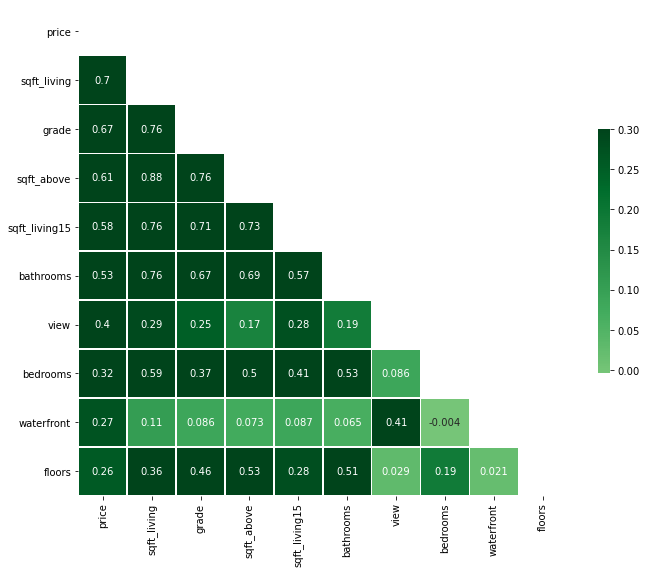

In [117]:
heatmap_df = no_bool_df.drop(columns='id')
heatmap_df = heatmap_df.dropna()
heatmap_df = heatmap_df.drop(labels=15856, axis=0)
heatmap_df.corr()
mask = np.triu(np.ones_like(heatmap_df.corr(), dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = "Greens"
sns.heatmap(heatmap_df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.savefig('heatmap.png');

**We made a visualization of the correlation between price and sqft_living because sqft_living is the variable most strongly correlated with price**

In [118]:
pricelow = heatmap_df["price"].quantile(0.01)
pricehigh  = heatmap_df["price"].quantile(0.99)

pricefiltered = heatmap_df[(heatmap_df["price"] < pricehigh) & (heatmap_df["price"] > pricelow)]

livinglow = pricefiltered["sqft_living"].quantile(0.01)
livinghigh  = pricefiltered["sqft_living"].quantile(0.99)

livingfiltered = pricefiltered[(pricefiltered["sqft_living"] < livinghigh) & (pricefiltered["sqft_living"] > livinglow)]

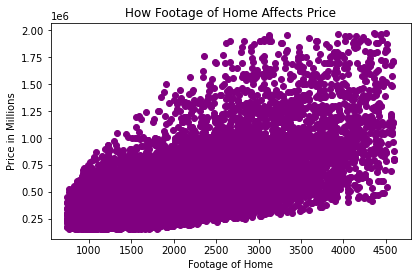

In [119]:
s = livingfiltered["sqft_living"]
p = livingfiltered["price"]
fig = plt.figure(figsize=(5, 3))
ax = fig.add_axes([0,0,1,1])
ax.scatter(s,p, color = "purple")
ax.set_title("How Footage of Home Affects Price")
ax.set_xlabel("Footage of Home")
ax.set_ylabel("Price in Millions")
#plt.tight_layout()
plt.savefig('how_footage_of_home_affects_price.png', bbox_inches='tight');
